This notebook is modified from https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

In [1]:
%%capture
%run week_03_util.ipynb

# Linear Regression

## The Normal Equation

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

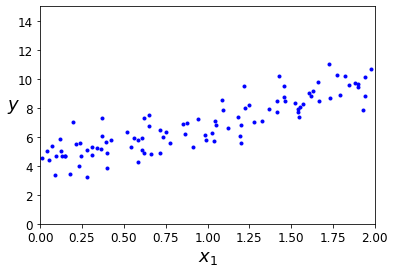

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

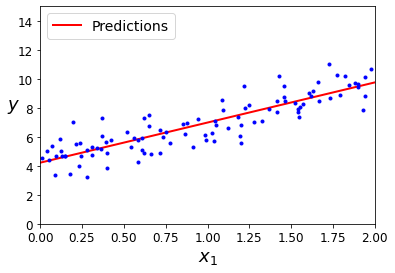

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

# Polynomial Regression

In [12]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [13]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

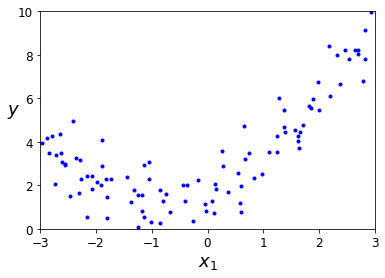

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [16]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

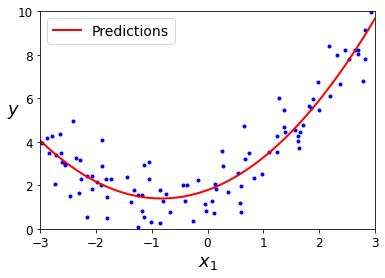

In [18]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

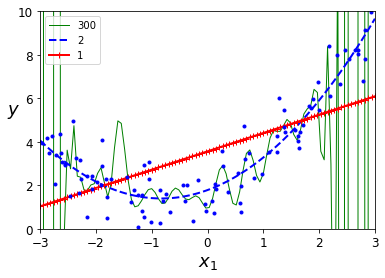

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

**Exercise.** Plot the singular values of the design matrix $\mathbf{X}$ for the polynomial fit with the degree of 300 in non-increasing order. What do you notice about the pattern? What would happen if you were to train a linear regression model of degree 300 using the normal equation method?

Now compute the singular values of the deign matrix $\mathbf{X}$ corresponding to the degrees 2 and 1 and compare/contrast with the degree of 300 case.

**Solution.** We can utilize `PolynomialFeatures` in scikit-learn. For example, the following code performs quadratic transform:
```
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
```
Note that the SVD of $\mathbf{X}$ is given by:
$$\mathbf{X} = \sum\limits_{i = 1}^{\mathrm{rank}(\mathbf{X})} \sigma_i \mathbf{u}_i  \mathbf{v}_i^T$$
and
$$\mathbf{X}^T \mathbf{X} = \sum\limits_{i = 1}^{\mathrm{rank}(\mathbf{X})} \sigma_i^2 \mathbf{v}_i  \mathbf{v}_i^T$$
and thus
$$(\mathbf{X}^T \mathbf{X})^+ = \sum\limits_{i = 1}^{\mathrm{rank}(\mathbf{X})}\frac{1}{\sigma_i^2} \mathbf{v}_i \mathbf{v}_i^T$$

As you can see in the below, the design matrix $\mathbf{X}$ has singular values dropping sharply to zero. This causes a problem when you invert $\mathbf{X}^T \mathbf{X}$ in the normal equation method:
$$\begin{align*}
\mathbf{X}^T \mathbf{X} \mathbf{\theta} =& \mathbf{X}^T \mathbf{y}\\
\mathbf{\theta} =& (\mathbf{X}^T \mathbf{X})^{-1} (\mathbf{X}^T \mathbf{y})
\end{align*}$$
Note that $\frac{1}{\sigma_i^2}$ will approach $\infty$ as $\sigma_i$ approaches $0$.

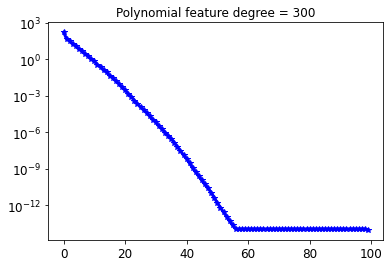

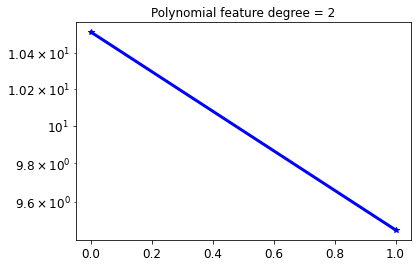

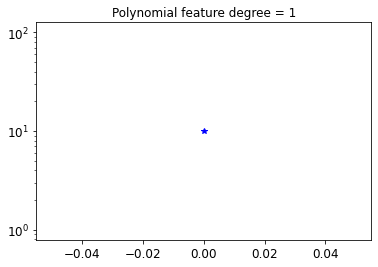

In [45]:
for degree in [300, 2, 1]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    polynomial_transform = Pipeline([
            ("poly_features", poly_features),
            ("std_scaler", std_scaler)
        ])
    X_poly = polynomial_transform.fit_transform(X)
    _, s, _ = np.linalg.svd(X_poly)
    fig = plt.figure()
    plt.title('Polynomial feature degree = {}'.format(degree))
    plt.gca().set_yscale('log')
    plt.plot([x for x in range(len(s))], s, "b*-", linewidth=3)